In [3]:
import pandas as pd
import numpy as np
import csv
import sqlite3
import matplotlib.pyplot as plt

In [4]:
cd "C:/Users/drewh/Documents/Flatiron Documents/Phase 1/movie_studio_analysis/zippedData"

C:\Users\drewh\Documents\Flatiron Documents\Phase 1\movie_studio_analysis\zippedData


CSV and STV:

    bom.movie_gross.csv.gz
    3386 rows, 5 columns
    rows - individual films
    Columns - title, studio, domestic gross, foreign gross, year
    
    tmdb.movies.csv.gz
    26517 rows, 10 columns
    Rows - individual films
    Columns - Unnamed: 0 (index duplicate), genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count
    
    tn.movie_budgets.csv.gz
    5782 rows, 6 columns
    Rows - individual films
    Columns - id, release_date, movie, production_budget, domestic_gross, worldwide_gross
    
    rt.movie_info.tsv.gz
    To open: pd.read_csv("./rt.movie_info.tsv.gz", sep="\t")
    1560 rows, 12 columns
    Rows - individual films
    Columns - id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio
    
    ./rt.reviews.tsv.gz
    to open: pd.read_csv("./rt.reviews.tsv.gz", sep="\t", encoding = 'unicode_escape')
    54432 rows, 8 columns
    Rows - 
    Columns - id, review, rating, fresh, critic, top_critic, publisher, data

SQL Tables

    movie_basics
    146144 rows, 6 columns
    Columns: movie_id, primary_title, original_title, start_year,
             runtime_minutes, genres
    
    directors
    291174 rows, 2 columns
    Columns: movie_id, person_id
    
    known_for
    1638260 rows, 2 columns
    Columns: person_id, movie_id
    
    movie_akas
    331703 rows, 8 columns
    Columns: movie_id, ordering, title, region, language, types, attributes, is_original_title
    
    movie_ratings
    73856 rows, 3 columns
    Columns: movie_id, averagerating, numvotes
    
    persons
    606648 rows × 5 columns
    Columns: person_id, primary_name, birth_year, death_year, primary_profession
             
    principals
    1028186 rows, 6 columns
    Columns: movie_id, ordering, person_id, category, job, characters
    
    writers
    255873 rows, 2 columns
    Columns: movie_id, person_id

In [ ]:
con = sqlite3.connect("./im.db")
cursor = con.cursor()

In [25]:
test = pd.read_sql("""
SELECT *
FROM movie_basics
""", con)
test

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [28]:
test2 = pd.read_csv("./bom.movie_gross.csv.gz")
test2

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [30]:
test2.merge(test, left_on="title", right_on="primary_title", how="inner")

,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...
3361,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,Souvenir,2014,86.0,"Comedy,Romance"
3362,Souvenir,Strand,11400.0,NaN,2018,tt3478898,Souvenir,Souvenir,2014,86.0,Documentary
3363,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller"
3364,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller"


Synthesis!
We have two tables with income information: BOM and TN. There's also some in the RT TSV, but very few of those films have box office values associated with them.

Variables we have:
-Runtime
-Studio
-Rating
-Genre
-Original language
-Production budget
-Ratings(i.e. reviews)
-People
    -Writers, directors, actors
    
For audience: the money made is the measure of success. What impacts that?
    -Ratings is an intermediary. Do positive ratings help? What improves ratings?
    -Are there particularly profitable individuals? Writers, directors, actors, etc.?

In [5]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 5CA0-02C2

 Directory of C:\Users\drewh\Documents\Flatiron Documents\Phase 1\movie_studio_analysis\zippedData

10/04/2022  10:11 AM    <DIR>          .
10/04/2022  10:11 AM    <DIR>          ..
09/30/2022  05:14 PM            53,544 bom.movie_gross.csv.gz
12/20/2021  04:31 PM       169,443,328 Ignore - im.db
09/30/2022  05:14 PM           498,202 rt.movie_info.tsv.gz
09/30/2022  05:14 PM         3,402,194 rt.reviews.tsv.gz
09/30/2022  05:14 PM           827,840 tmdb.movies.csv.gz
09/30/2022  05:14 PM           153,218 tn.movie_budgets.csv.gz
               6 File(s)    174,378,326 bytes
               2 Dir(s)  35,134,722,048 bytes free


In [6]:
movie_budgets = pd.read_csv("tn.movie_budgets.csv.gz")

In [7]:
movie_budgets["production_budget"]
def clean_money(df, money_column):
    df[money_column] = df[money_column].str.replace(',','')
    df[money_column] = df[money_column].str.replace('$','')
    df[money_column] = pd.to_numeric(df[money_column])
    return df

#cleaning
movie_budgets = clean_money(movie_budgets,'production_budget')
movie_budgets = clean_money(movie_budgets,'domestic_gross')
movie_budgets = clean_money(movie_budgets,'worldwide_gross')

In [8]:
movie_budgets["profit"] = movie_budgets["worldwide_gross"] - movie_budgets["production_budget"]
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400


In [17]:
con = sqlite3.connect("./im.db")
cursor = con.cursor()

In [10]:
pd.read_sql("""
SELECT *
FROM sqlite_master
""", con)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [11]:
persons = pd.read_sql("""
SELECT *
FROM persons
""", con)
persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [12]:
writers = pd.read_sql("""
SELECT *
FROM writers
""", con)
writers

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [14]:
full_writers

,movie_id,writer_name,death_year
0,tt0285252,Tony Vitale,NaN
1,tt0438973,Steve Conrad,NaN
2,tt0438973,Sean Sorensen,NaN
3,tt0462036,Bill Haley,NaN
4,tt0835418,Peter Gaulke,NaN
...,...,...,...
255868,tt8999892,Bradley T. Castle,NaN
255869,tt8999974,Daysi Burbano,NaN
255870,tt9001390,Bernard Lessa,NaN
255871,tt9004986,Fredrik Horn Akselsen,NaN


In [13]:
full_writers = writers.merge(persons, left_on="person_id", right_on="person_id", how="left")
full_writers.drop(labels=["person_id", "birth_year", "primary_profession"], axis=1, inplace=True)
full_writers = full_writers.rename(columns={"primary_name": "writer_name"})

In [299]:
films = pd.read_sql("""
SELECT *
FROM movie_basics
""", con)

In [298]:
film_writers = full_writers.merge(films, left_on="movie_id", right_on="movie_id",
              how="left")
film_writers.drop(labels=["movie_id","genres", "runtime_minutes", "start_year", "original_title"], axis=1, inplace=True)

In [297]:
writer_profit = movie_budgets.merge(film_writers, left_on="movie", right_on="primary_title", how="left")
writer_profit.dropna(subset=["writer_name"], inplace=True)

In [296]:
clean_writers = writer_profit.drop_duplicates()

In [281]:
avg_writer_profit = clean_writers.drop_duplicates(subset="movie").mean()["profit"]

In [295]:
writer_films_strong = clean_writers.drop(clean_writers[clean_writers.profit < avg_writer_profit].index)

In [294]:
potential_writers = writer_films_strong.drop(writer_films_strong[writer_films_strong["death_year"]>1].index)

In [287]:
writer_pros = dict(potential_writers["writer_name"].value_counts())

In [293]:
writer_films_weak = clean_writers.drop(clean_writers[clean_writers.profit > avg_writer_profit].index)

In [292]:
questionable_writers = writer_films_weak.drop(writer_films_weak[writer_films_weak["death_year"]>1].index)

In [241]:
writer_cons = dict(questionable_writers["writer_name"].value_counts())

In [290]:
writer_points = {}
for writer in writer_pros:
    if writer in writer_cons:
        points = writer_pros[writer] - writer_cons[writer]
    else:
        points = writer_pros[writer]
    writer_points[writer] = points

In [291]:
top_writers = dict(sorted(writer_points.items(), key=lambda x:x[1], reverse=True))

In [271]:
writers_x = list(top_writers.keys())[:11]
writers_y = list(top_writers.values())[:11]

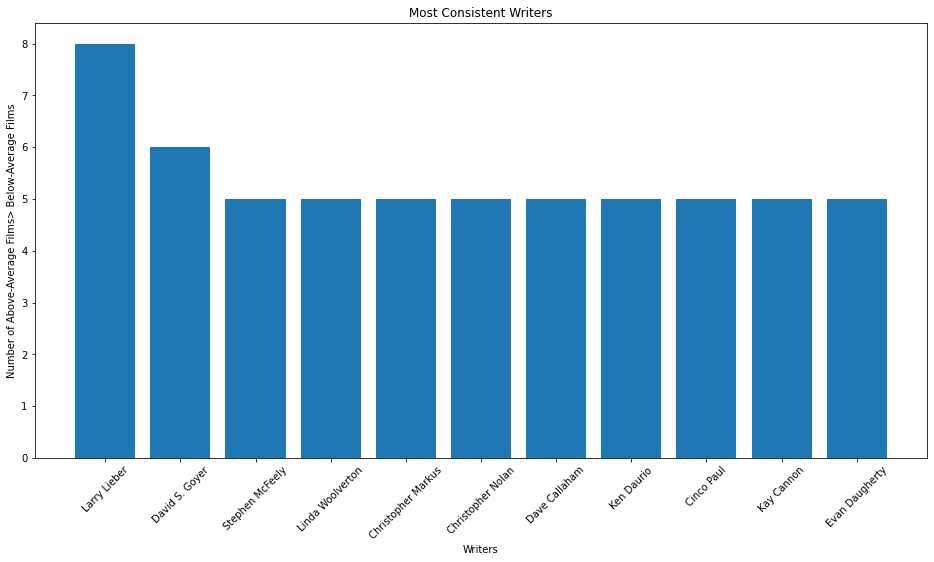

In [276]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.bar(x=writers_x, height=writers_y)

ax.set_xlabel('Writers')
ax.set_ylabel('Number of Above-Average Films> Below-Average Films')
ax.set_title('Most Consistent Writers')
plt.xticks(rotation=45);

# Directors

In [338]:
directors = pd.read_sql("""
SELECT *
FROM directors
""", con)

In [309]:
full_directors = directors.merge(persons, left_on="person_id", right_on="person_id", how="left")
full_directors.drop(labels=["person_id", "birth_year", "primary_profession"], axis=1, inplace=True)
full_directors = full_directors.rename(columns={"primary_name": "director_name"})

In [337]:
film_directors = full_directors.merge(films, left_on="movie_id", right_on="movie_id",
              how="left")
film_directors.drop(labels=["movie_id","genres", "runtime_minutes", "start_year", "original_title"], axis=1, inplace=True)

In [312]:
dir_profit = movie_budgets.merge(film_directors, left_on="movie", right_on="primary_title", how="left")
dir_profit.dropna(subset=["director_name"], inplace=True)

In [313]:
clean_dir = dir_profit.drop_duplicates()

In [314]:
avg_dir_profit = clean_dir.drop_duplicates(subset="movie").mean()["profit"]

In [315]:
dir_films_strong = clean_dir.drop(clean_dir[clean_dir.profit < avg_dir_profit].index)

In [316]:
potential_dir = dir_films_strong.drop(dir_films_strong[dir_films_strong["death_year"]>1].index)

In [317]:
dir_pros = dict(potential_dir["director_name"].value_counts())

In [318]:
dir_films_weak = clean_dir.drop(clean_dir[clean_dir.profit > avg_dir_profit].index)

In [319]:
questionable_dir = dir_films_weak.drop(dir_films_weak[dir_films_weak["death_year"]>1].index)

In [320]:
dir_cons = dict(questionable_dir["director_name"].value_counts())

In [321]:
dir_points = {}
for _dir in dir_pros:
    if _dir in dir_cons:
        points = dir_pros[_dir] - dir_cons[_dir]
    else:
        points = dir_pros[_dir]
    dir_points[_dir] = points

In [331]:
top_dir = dict(sorted(dir_points.items(), key=lambda x:x[1], reverse=True))

In [335]:
dir_x = list(top_dir.keys())[:9]
dir_y = list(top_dir.values())[:9]

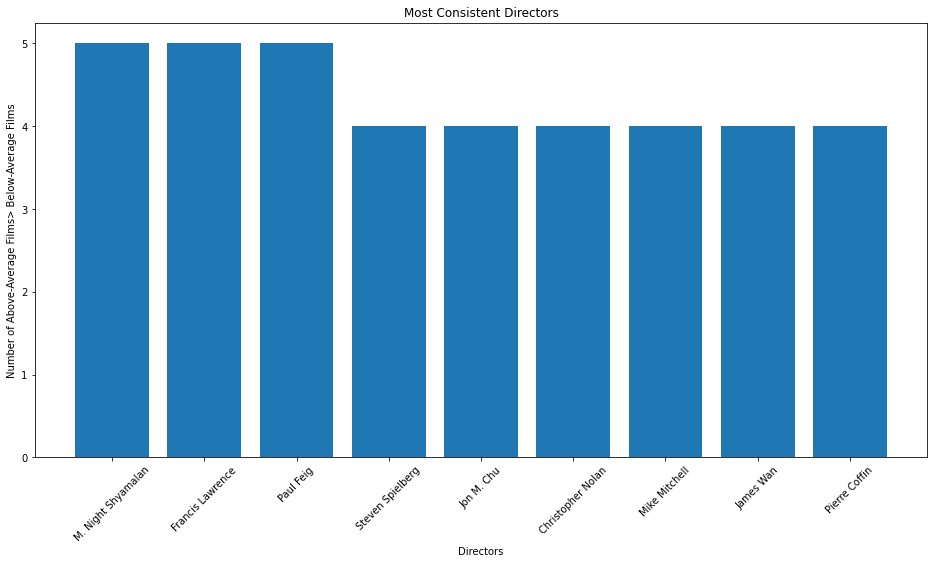

In [336]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.bar(x=dir_x, height=dir_y)

ax.set_xlabel('Directors')
ax.set_ylabel('Number of Above-Average Films> Below-Average Films')
ax.set_title('Most Consistent Directors')
plt.xticks(rotation=45);

# Actors

In [343]:
persons =  pd.read_sql("""
SELECT *
FROM principals
""", con)

In [346]:
persons

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [345]:
persons["category"].value_counts()

actor                  256718
director               146393
actress                146208
producer               113724
cinematographer         80091
composer                77063
writer                  74357
self                    65424
editor                  55512
production_designer      9373
archive_footage          3307
archive_sound              16
Name: category, dtype: int64

In [373]:
persons[persons["category"] == "actor"] 

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().